### Importing liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Data

In [2]:
customer=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Customers.csv')
print(customer.shape)
customer.head()

(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
products=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Products.csv')
print(products.shape)
products.head()

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
transactions=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Transactions.csv')
print(transactions.shape)
transactions.head()

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Preparation

In [5]:
#Merging all three data
data=pd.merge(customer,transactions,how='inner',on='CustomerID')
data.rename(columns={'Price':'transaction_price'},inplace=True)
data=pd.merge(data,products,how='inner',on='ProductID')
data.rename(columns={'Price':'product_price'},inplace=True)
data.head()


,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,transaction_price,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3


In [6]:
# droping  transaction_price
data.drop('transaction_price',axis=1,inplace=True)
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


In [7]:
data.shape

(1000, 12)

In [8]:
customer_data=data.copy()

In [9]:
customer_features = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'Region': lambda x: x.mode()[0],# Region
    'Category': lambda x: x.mode()[0],  # Most common category
    'ProductID': 'count'  # Total products purchased
}).reset_index()
customer_features.head()

,CustomerID,TotalValue,Region,Category,ProductID
0,C0001,3354.52,South America,Electronics,5
1,C0002,1862.74,Asia,Clothing,4
2,C0003,2725.38,South America,Home Decor,4
3,C0004,5354.88,South America,Books,8
4,C0005,2034.24,Asia,Electronics,3


In [10]:
print('Number of Rows : ',customer_features.shape[0])
print('Number of Columns : ',customer_features.shape[1])

Number of Rows :  199
Number of Columns :  5


In [11]:
# Checking Null values
customer_features.isnull().sum()

CustomerID    0
TotalValue    0
Region        0
Category      0
ProductID     0
dtype: int64

<Axes: >

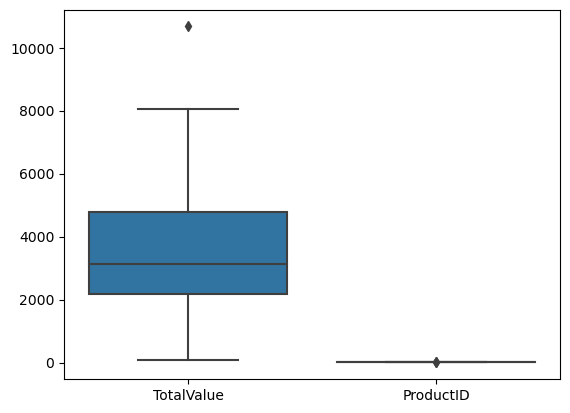

In [12]:
#checking outliers
sns.boxplot(customer_features)

### Feature Engineering

In [13]:
data.Category.unique()

array(['Books', 'Home Decor', 'Electronics', 'Clothing'], dtype=object)

In [14]:
data.Region.unique()

array(['South America', 'Europe', 'North America', 'Asia'], dtype=object)

In [15]:
regions={'South America':0, 'Europe':1, 'North America': 3, 'Asia': 4}
categories={'Books':1 ,'Home Decor' : 1,'Electronics':2,'Clothing':3}
x=customer_features['Category'].map(categories)
y=customer_features['Region'].map(regions)

In [16]:
customer_features['Region']=y
customer_features['Category']=x
customer_features.head()

,CustomerID,TotalValue,Region,Category,ProductID
0,C0001,3354.52,0,2,5
1,C0002,1862.74,4,3,4
2,C0003,2725.38,0,1,4
3,C0004,5354.88,0,1,8
4,C0005,2034.24,4,2,3


#### Feature Scaling

In [17]:
scalar=StandardScaler()
scaled_data=scalar.fit_transform(customer_features.drop(['CustomerID'],axis=1).iloc[:20,:])
scaled_data

array([[ 0.15512667, -1.04595272,  0.3560345 ,  0.1077076 ],
       [-0.75072896,  1.56892908,  1.54281616, -0.32312281],
       [-0.22690688, -1.04595272, -0.83074716, -0.32312281],
       [ 1.36980802, -1.04595272, -0.83074716,  1.40019886],
       [-0.64658877,  1.56892908,  0.3560345 , -0.75395323],
       [ 0.68527002, -1.04595272, -0.83074716, -0.32312281],
       [-0.31529548,  1.56892908,  0.3560345 , -0.75395323],
       [ 0.71201249,  0.91520863, -0.83074716,  2.2618597 ],
       [-1.3374602 , -0.39223227,  1.54281616, -0.75395323],
       [-0.83889288, -0.39223227,  1.54281616, -0.32312281],
       [ 0.3831299 , -1.04595272, -0.83074716,  0.1077076 ],
       [ 1.29474208, -1.04595272, -0.83074716,  0.96936844],
       [ 1.76188518, -1.04595272,  1.54281616,  0.96936844],
       [-1.68834278, -0.39223227, -0.83074716, -1.61561407],
       [-1.17898496,  0.91520863, -0.83074716, -1.18478365],
       [ 0.47082626,  0.91520863,  1.54281616,  0.1077076 ],
       [ 1.00482553, -0.

### Calculate Similarities:

In [24]:
similarity_matrix = cosine_similarity(scaled_data)
similarity_matrix

array([[ 1.        , -0.47241939,  0.46644084,  0.4370747 , -0.80014667,
         0.50528101, -0.81297809, -0.29991488,  0.27061481,  0.38776088,
         0.55641781,  0.4693158 ,  0.65757529, -0.11420767, -0.67100013,
        -0.15527173,  0.19238992, -0.60106365,  0.06424521, -0.46777293],
       [-0.47241939,  1.        , -0.80990881, -0.79126074,  0.84267504,
        -0.92458835,  0.82422876, -0.17702744,  0.58030371,  0.58235962,
        -0.99192658, -0.85460443, -0.13931734, -0.01824694,  0.29144514,
         0.78610049, -0.67706586, -0.17167858, -0.58716284,  0.64627568],
       [ 0.46644084, -0.80990881,  1.        ,  0.30914869, -0.58722727,
         0.81025833, -0.64520029, -0.31131873, -0.10528634, -0.22646596,
         0.85634395,  0.40289156, -0.23583451,  0.57344459,  0.13235276,
        -0.92001545,  0.15438232, -0.23842871,  0.62919485, -0.13416569],
       [ 0.4370747 , -0.79126074,  0.30914869,  1.        , -0.86514991,
         0.62360177, -0.80042201,  0.61124401, -

In [36]:
# Top 3 similarity excluding itself
print(type(similarity_matrix[0]))
similarity_matrix[0].sort()
similarity_matrix[0][-2:-5:-1]

<class 'numpy.ndarray'>


array([0.65757529, 0.55641781, 0.50528101])

In [20]:
# Top 3 similarity excluding itself(index)
similarity_matrix[0].argsort()[-2:-5:-1]

array([12, 10,  5], dtype=int64)

### making lookalike data

In [37]:
lookalike_map = {}
for i, customer_id in enumerate(customer_features['CustomerID'][:20]):
    similar_indices = similarity_matrix[i].argsort()[-2:-5:-1]  # Top 3 excluding self
    lookalike_map[customer_id] = [
        (customer_features['CustomerID'][j], similarity_matrix[i][j]) for j in similar_indices
    ]

In [38]:
lookalike_map

{'C0001': [('C0019', 0.6575752856953185),
  ('C0018', 0.5564178123279397),
  ('C0017', 0.5052810071542508)],
 'C0002': [('C0005', 0.842675039239537),
  ('C0007', 0.8242287614562364),
  ('C0016', 0.7861004897635816)],
 'C0003': [('C0011', 0.8563439490410754),
  ('C0006', 0.8102583320103939),
  ('C0019', 0.6291948546719334)],
 'C0004': [('C0012', 0.9882774069326655),
  ('C0017', 0.9583251061097452),
  ('C0011', 0.7443908256615475)],
 'C0005': [('C0007', 0.9850051004178146),
  ('C0002', 0.842675039239537),
  ('C0020', 0.833494526627534)],
 'C0006': [('C0011', 0.9400141381465871),
  ('C0003', 0.8102583320103939),
  ('C0012', 0.7320733968852458)],
 'C0007': [('C0005', 0.9850051004178146),
  ('C0002', 0.8242287614562364),
  ('C0020', 0.7681358189808253)],
 'C0008': [('C0017', 0.8068312622729276),
  ('C0004', 0.6112440107784894),
  ('C0018', 0.5813989494177129)],
 'C0009': [('C0010', 0.9644911498203443),
  ('C0020', 0.6225447357700417),
  ('C0002', 0.5803037147202216)],
 'C0010': [('C0009', 0

#### creating a dataframe

In [39]:
zeotap=pd.DataFrame.from_dict(lookalike_map,orient='index').reset_index()
zeotap.rename(columns={'index':'CustomerID',0:'Look-alike_1',1:'Look-alike_2',2:'Look-alike_3'},inplace=True)
zeotap

,CustomerID,Look-alike_1,Look-alike_2,Look-alike_3
0,C0001,"(C0019, 0.6575752856953185)","(C0018, 0.5564178123279397)","(C0017, 0.5052810071542508)"
1,C0002,"(C0005, 0.842675039239537)","(C0007, 0.8242287614562364)","(C0016, 0.7861004897635816)"
2,C0003,"(C0011, 0.8563439490410754)","(C0006, 0.8102583320103939)","(C0019, 0.6291948546719334)"
3,C0004,"(C0012, 0.9882774069326655)","(C0017, 0.9583251061097452)","(C0011, 0.7443908256615475)"
4,C0005,"(C0007, 0.9850051004178146)","(C0002, 0.842675039239537)","(C0020, 0.833494526627534)"
5,C0006,"(C0011, 0.9400141381465871)","(C0003, 0.8102583320103939)","(C0012, 0.7320733968852458)"
6,C0007,"(C0005, 0.9850051004178146)","(C0002, 0.8242287614562364)","(C0020, 0.7681358189808253)"
7,C0008,"(C0017, 0.8068312622729276)","(C0004, 0.6112440107784894)","(C0018, 0.5813989494177129)"
8,C0009,"(C0010, 0.9644911498203443)","(C0020, 0.6225447357700417)","(C0002, 0.5803037147202216)"
9,C0010,"(C0009, 0.9644911498203443)","(C0002, 0.5823596192661561)","(C0016, 0.46860949102163985)"


#### saving the dataset

In [42]:
zeotap.to_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Abhinav_Singh_Lookalike.csv',index=False)